### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read csv File

In [2]:
data = pd.read_csv('kyphosis.csv')

### Data Visualization and Exploration

#### a. Print at least 5 rows for sanity check to identify all the features present in the dataset and  if the target matches with them.

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
data.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


#### b. Print the description and shape of the dataset.

In [5]:
data.describe(percentiles=None, include=None, exclude=None)

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
data.shape

(81, 4)

In [7]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

#### c. Provide appropriate visualization to get an insight about the dataset. 


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

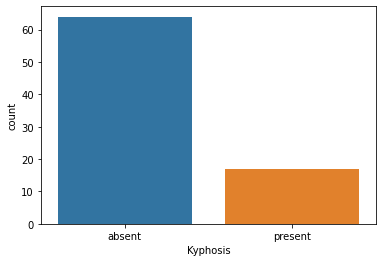

In [8]:
sns.countplot(data['Kyphosis'], label ='Count')

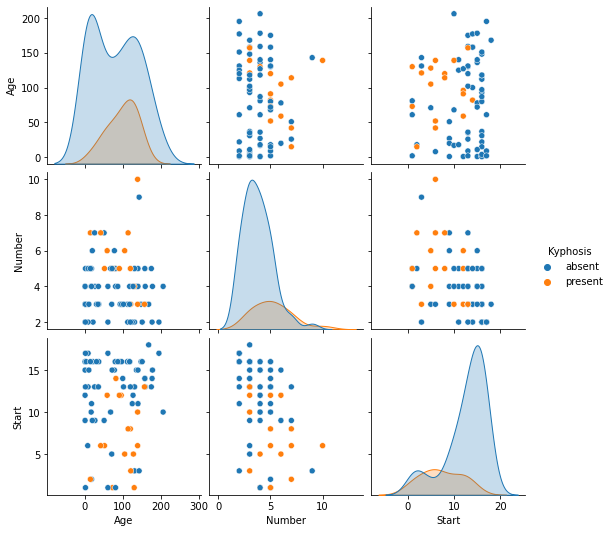

In [9]:
sns.pairplot(data,hue='Kyphosis')

In [10]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [11]:
data['Age'].max()

206

In [12]:
data['Age'].min()

1

In [13]:
data['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

<AxesSubplot:>

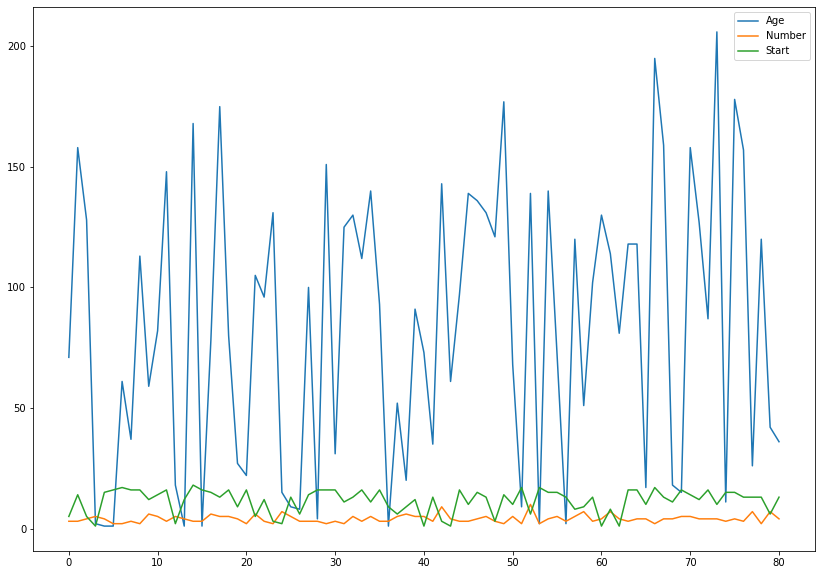

In [14]:
data.plot(figsize=(14, 10))

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [16]:
LabelEncoder_y = LabelEncoder()
data['Kyphosis'] = LabelEncoder_y.fit_transform(data['Kyphosis'])

In [17]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [18]:
data_True = data[data['Kyphosis']==1]

In [19]:
data_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [20]:
data_False = data[data['Kyphosis']==0]

In [21]:
data_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [22]:
print('Disease present after operation percentage is',
      (len(data_True)/len(data))*100, '%')

Disease present after operation percentage is 20.98765432098765 %


In [23]:
print('Disease not present after operation percentage is',
      (len(data_False)/len(data))*100, '%')

Disease not present after operation percentage is 79.01234567901234 %


### d. Try exploring the data and see what insights can be drawn from the dataset. 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int32
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int32(1), int64(3)
memory usage: 2.3 KB


In [25]:
data['Age'].value_counts()

1      5
2      3
118    2
140    2
158    2
      ..
178    1
51     1
52     1
59     1
127    1
Name: Age, Length: 64, dtype: int64

In [26]:
data['Number'].value_counts()

3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Number, dtype: int64

In [27]:
data['Start'].value_counts()

16    17
13    12
15     7
1      5
12     5
14     5
6      4
9      4
10     4
17     4
3      3
5      3
11     3
2      2
8      2
18     1
Name: Start, dtype: int64

## 3. Data Pre-processing and cleaning 

#### a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if  any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate  feature engineering techniques for them. 


In [28]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [29]:
data['Age'].isnull().sum()

0

In [30]:
data['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [31]:
data['Age'].nunique()

64

### Total Row is 81 so the given data is of 81 person and the unique age is 64 person.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int32
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int32(1), int64(3)
memory usage: 2.3 KB


In [33]:
print(data.isnull().sum())

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64


#### So the null value in this dataset is zero.

In [34]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [35]:
data['Age'].min()

1

In [36]:
data['Age'].max()

206

<AxesSubplot:xlabel='Age'>

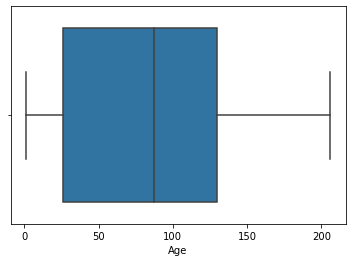

In [37]:
sns.boxplot(data['Age'], orient = 'v')

### b. Apply the feature transformation techniques like Standardization, Normalization, etc. You  are free to apply the appropriate transformations depending upon the structure and the  complexity of your dataset. 


In [38]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [39]:
data['Age'].min()

1

In [40]:
data['Age'].max()

206

#### From above graph the maximum range of Age between 20 to 120, here data is not so big that why don't use transformation techinique.

### C. Do the correlational analysis on the dataset. Provide a visualization for the same. 


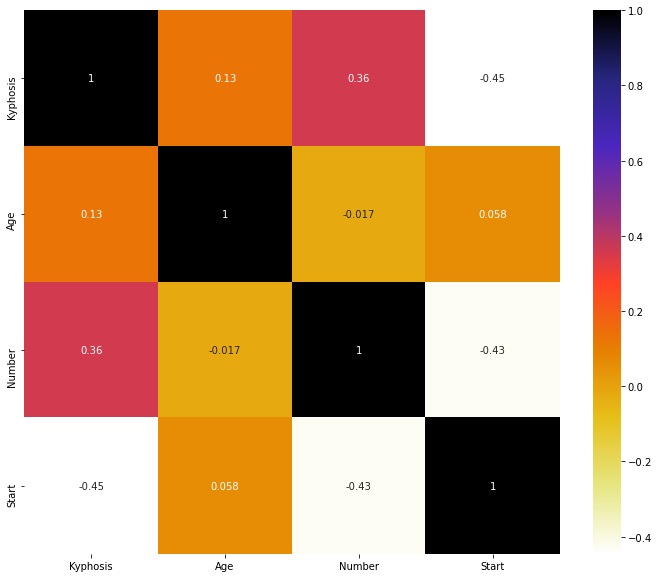

In [41]:
#Correlation 
#Displaying Correlation between varaibles using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### Relation in correlational matrix is not similar.

## 4. Data Preparation 

#### a. Do the final feature selection and extract them into Column X and the class label into  Column into Y. 

In [42]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [43]:
X = data.drop(['Kyphosis'], axis =1)

In [44]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [45]:
y = data['Kyphosis']

In [46]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: int32

In [47]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [48]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [49]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

### b. Split the dataset into training and test sets. 


In [50]:
# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 2,stratify=y)

In [51]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Find feature importance
feature_importance = pd.DataFrame(decision_tree.feature_importances_,
                                  index = X_train.columns,
                                  columns = ['importance'] )

In [53]:
feature_importance

,importance
Age,0.391972
Number,0.254160
Start,0.353868


In [54]:
# Sorted Feature Importance
feature_importance = pd.DataFrame(
    decision_tree.feature_importances_,
    index = X_train.columns,
    columns = ['importance']).sort_values('importance',
    ascending = False)

In [55]:
feature_importance

,importance
Age,0.391972
Start,0.353868
Number,0.254160


## Part B

### 1. Model Building 
#### a. Perform Model Development using at least three models, separately. You are free to  apply any Machine Learning Models on the dataset. Deep Learning Models are strictly  not allowed.


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_reg = LogisticRegression()

In [60]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = log_reg.predict(X_test)

In [62]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
y_test.shape

(17,)

### b. Train the model and print the training accuracy and loss values.

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [65]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8235294117647058


## 2. Performance Evaluation 
#### a. Print the confusion matrix. Provide appropriate analysis for the same. 


In [66]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 3,  0]], dtype=int64)

#### b. Do the prediction for the test data and display the results for the inference.  


In [67]:
print("Report:", classification_report(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17

